In [2]:
# club

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score, matthews_corrcoef
from imblearn.over_sampling import RandomOverSampler

data = pd.read_csv("C:\\Users\\co279\\penalty.csv")

data=data.iloc[:,4:]
data.dropna(inplace=True)

# data preprocessing
data = pd.get_dummies(data, columns=['position'])
data = pd.get_dummies(data, columns=['order'])

# label encoding 'score' column
label_encoder = LabelEncoder()
data['score'] = label_encoder.fit_transform(data['score'])

scaler = StandardScaler()
data[['goals','age']] = scaler.fit_transform(data[['goals','age']])

# data spliting (X, y)
X = data.drop(columns=['score'])
y = data['score']

# data spliting (train, test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=411, stratify=y)

oversampler = RandomOverSampler(sampling_strategy='minority', random_state=411)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

# random forest
rf_model = RandomForestClassifier(random_state=411)

# hyperparameter grid
param_grid = {
    'n_estimators': [300, 500], 
    'max_depth': [20, 30],  
    'min_samples_split': [2, 3],  
    'min_samples_leaf': [2, 3]  
}

# GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

# best hyperparameter
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# best model
best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test)

# model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:", accuracy)

f1 = f1_score(y_test, y_pred)
print("f1_score:", f1)

roc = roc_auc_score(y_test, y_pred)
print("roc_auc:", roc)

mcc = matthews_corrcoef(y_test, y_pred)
print("MCC:", mcc)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

최적의 하이퍼파라미터: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
accuracy: 0.6742424242424242
f1_score: 0.3302180685358255
roc_auc: 0.557625
MCC: 0.11500658738561638
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       500
           1       0.33      0.33      0.33       160

    accuracy                           0.67       660
   macro avg       0.56      0.56      0.56       660
weighted avg       0.67      0.67      0.67       660

Confusion Matrix:
[[392 108]
 [107  53]]


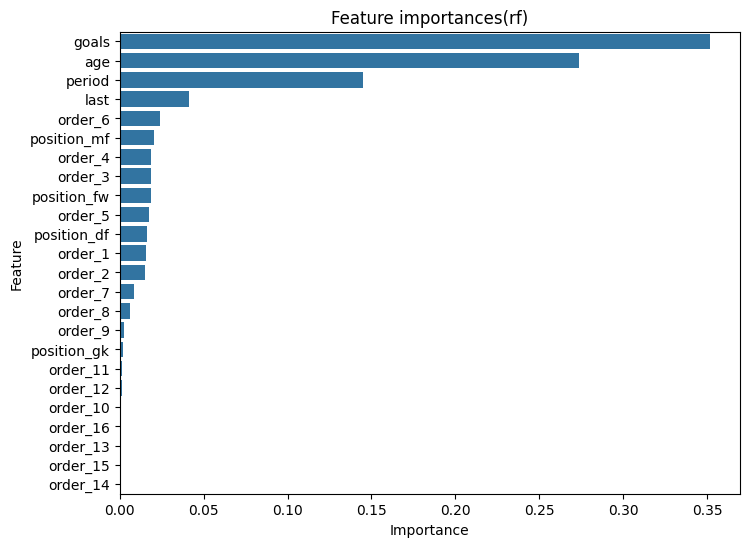

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

X_resampled_df = pd.DataFrame(X_resampled, columns=data.drop(columns=['score']).columns)

# feature importance visualization
ftr_importances_values = best_rf_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_resampled_df.columns)
ftr_top = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances(rf)')
sns.barplot(x=ftr_top , y = ftr_top.index)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [3]:
# international

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score, matthews_corrcoef
from imblearn.over_sampling import RandomOverSampler

data = pd.read_csv("C:\\Users\\co279\\penalty_international.csv")

data=data.iloc[:,4:]
data.dropna(inplace=True)

# data preprocessing
data = pd.get_dummies(data, columns=['position'])
data = pd.get_dummies(data, columns=['order'])

# label encoding 'score' column
label_encoder = LabelEncoder()
data['score'] = label_encoder.fit_transform(data['score'])

scaler = StandardScaler()
data[['goals','age']] = scaler.fit_transform(data[['goals','age']])

# data spliting (X, y)
X = data.drop(columns=['score'])
y = data['score']

# data spliting (train, test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=411, stratify=y)

oversampler = RandomOverSampler(sampling_strategy='minority', random_state=411)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

# random forest
rf_model = RandomForestClassifier(random_state=411)

# hyperparameter grid
param_grid = {
    'n_estimators': [200, 300, 500], 
    'max_depth': [10, 20, 30],  
    'min_samples_split': [2, 3],  
    'min_samples_leaf': [2, 3]  
}

# GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

# best hyperparameter
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# best model
best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test)

# model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:", accuracy)

f1 = f1_score(y_test, y_pred)
print("f1_score:", f1)

roc = roc_auc_score(y_test, y_pred)
print("roc_auc:", roc)

mcc = matthews_corrcoef(y_test, y_pred)
print("MCC:", mcc)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

최적의 하이퍼파라미터: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
accuracy: 0.5921052631578947
f1_score: 0.225
roc_auc: 0.47621079581822057
MCC: -0.04993529318333072
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.74      0.72       109
           1       0.24      0.21      0.23        43

    accuracy                           0.59       152
   macro avg       0.47      0.48      0.47       152
weighted avg       0.57      0.59      0.58       152

Confusion Matrix:
[[81 28]
 [34  9]]


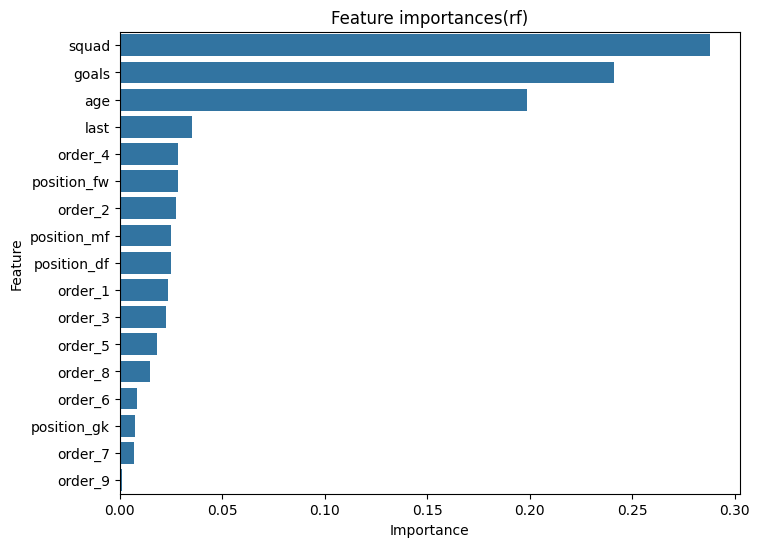

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

X_resampled_df = pd.DataFrame(X_resampled, columns=data.drop(columns=['score']).columns)

# feature importance visualization
ftr_importances_values = best_rf_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_resampled_df.columns)
ftr_top = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances(rf)')
sns.barplot(x=ftr_top , y = ftr_top.index)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()